In [1]:
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from unet import unet_model

In [38]:
image_directory = 'dl_data/training/'
mask_directory = 'dl_data/ground_truth/'
SIZE = 256
image_dataset = []
mask_dataset = []

images = os.listdir(image_directory)
images = sorted(images)
print(images)
for i, image_name in enumerate(images):
    if (image_name.split('.')[-1] == 'png'):
        image = cv2.imread(image_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))
        image_dataset.append(np.array(image.rotate(90)))
        image_dataset.append(np.array(image.rotate(-90)))
        image_dataset.append(np.array(image.rotate(180)))

masks = os.listdir(mask_directory)
masks = sorted(masks)
print(masks)
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image).astype(bool))
        mask_dataset.append(np.array(image.rotate(90)).astype(bool))
        mask_dataset.append(np.array(image.rotate(-90)).astype(bool))
        mask_dataset.append(np.array(image.rotate(180)).astype(bool))

# for i, image_name in enumerate(masks):
#     if (image_name.split('.')[1] == 'png'):
#         image = cv2.imread(mask_directory+image_name, 0)
#         image = Image.fromarray(image)
#         image = image.resize((SIZE, SIZE))
#         mask_dataset.append(np.array(image))


['20230207_Me4_NPs_perov_1um.0_00009.png', '20230207_MeO_NPs_perov_1um.0_00005.png', '20230207_MeO_perov_1um.0_00002.png']
['task-20-annotation-21-by-1-tag-grain-0.png', 'task-23-annotation-22-by-1-tag-grain-0.png', 'task-26-annotation-23-by-1-tag-grain-0.png']


image dataset size: 12
mask dataset size: 12


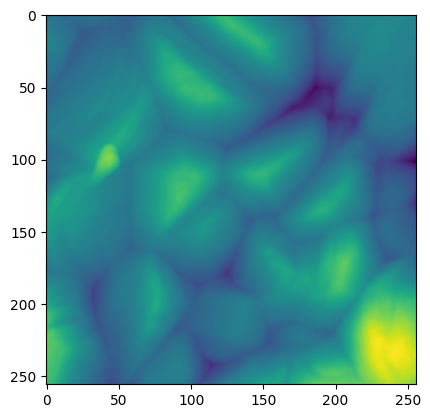

(256, 256)


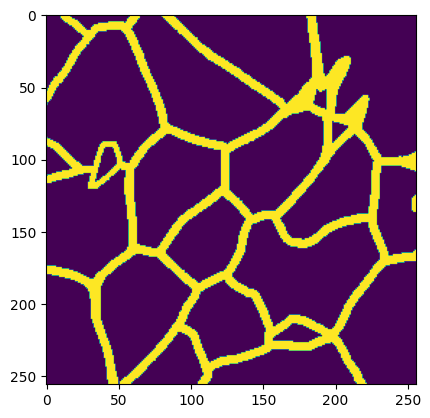

(256, 256)
[False  True]


In [39]:
index = np.random.randint(0, len(image_dataset)-1)
print(f'image dataset size: {len(image_dataset)}')
print(f'mask dataset size: {len(mask_dataset)}')

plt.imshow(image_dataset[index])
plt.show()
print(np.shape(image_dataset[index]))


plt.imshow(mask_dataset[index])
plt.show()
print(np.shape(mask_dataset[index]))
print(np.unique(mask_dataset[index]))

In [40]:
# Normalise the training images. The images are in 0-255 range with 3 channels
# 1600, 256, 256, 1
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1), 3)
# Do not normalize the masks, just rescale them to 0-1 range, because they do not have 3 colour channels.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3)

print(image_dataset.shape)
print(mask_dataset.shape)
print(np.unique(image_dataset))
print(np.max(image_dataset))
print(np.unique(mask_dataset))

(12, 256, 256, 1)
(12, 256, 256, 1)
[0.01642957 0.01717486 0.01731557 ... 0.11212569 0.11238493 0.11238765]
0.11238764552371248
[False  True]


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.1, random_state=0)

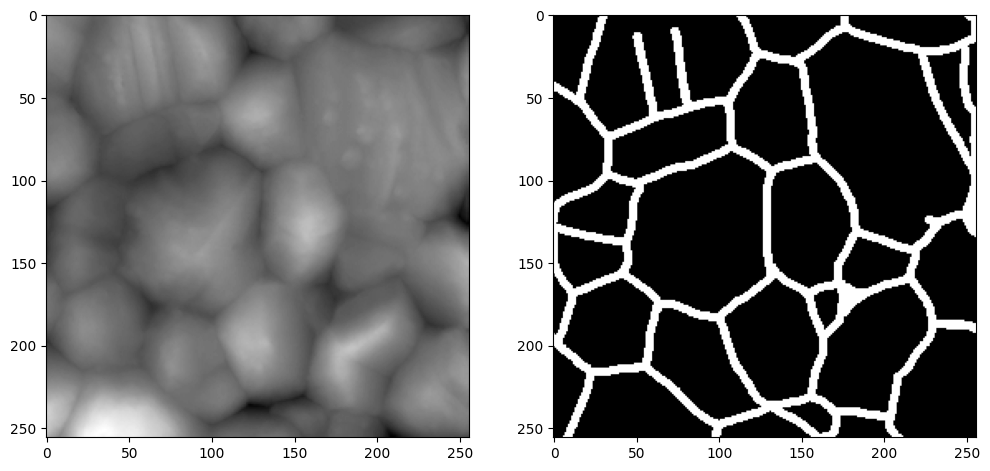

In [50]:
# Check things are working correctly
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()

In [51]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

def get_model():
    return unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model = get_model()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 256, 256, 16  160         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_18 (Dropout)           (None, 256, 256, 16  0           ['conv2d_38[0][0]']              
                                )                                                           

In [ ]:
# Can load the model:
# model.load_weights('mitochondria_test.hdf5')

In [52]:
history = model.fit(
    X_train,
    y_train,
    batch_size=1,
    verbose=1,
    epochs=50,
    validation_data=(X_test, y_test),
    shuffle=False
)

model.save('kDNA_test.hdf5')

Epoch 1/50


2023-03-20 20:26:39.256126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 9/10 [==========================>...] - ETA: 0s - loss: 0.7331 - accuracy: 0.8130

2023-03-20 20:26:41.093949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 3s 120ms/step - loss: 0.7202 - accuracy: 0.8170 - val_loss: 0.6077 - val_accuracy: 0.8399
Epoch 2/50
10/10 [==============================] - 1s 51ms/step - loss: 0.5336 - accuracy: 0.8297 - val_loss: 0.4331 - val_accuracy: 0.8399
Epoch 3/50
10/10 [==============================] - 1s 57ms/step - loss: 0.4456 - accuracy: 0.8303 - val_loss: 0.4131 - val_accuracy: 0.8399
Epoch 4/50
10/10 [==============================] - 1s 51ms/step - loss: 0.4308 - accuracy: 0.8304 - val_loss: 0.4157 - val_accuracy: 0.8399
Epoch 5/50
10/10 [==============================] - 0s 44ms/step - loss: 0.4273 - accuracy: 0.8304 - val_loss: 0.4073 - val_accuracy: 0.8399
Epoch 6/50
10/10 [==============================] - 0s 44ms/step - loss: 0.4228 - accuracy: 0.8304 - val_loss: 0.4049 - val_accuracy: 0.8399
Epoch 7/50
10/10 [==============================] - 0s 44ms/step - loss: 0.4172 - accuracy: 0.8304 - val_loss: 0.3947 - val_accuracy: 0.8399
Epoch 8/50
10/10 [=====

In [53]:
# Check model accuracy
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

2023-03-20 20:27:06.049917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 544ms/step - loss: 0.4033 - accuracy: 0.8936
Accuracy =  89.35775756835938 %


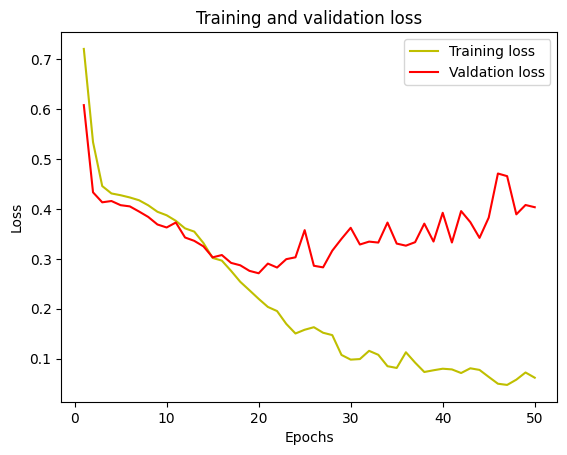

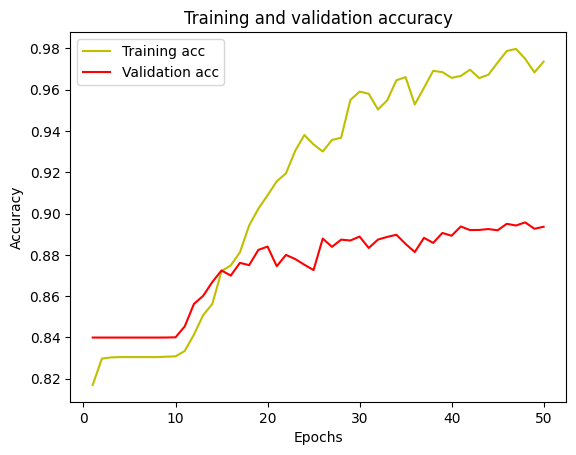

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Valdation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
# Note that for semantic segmentation, accuracy is not the correct metric.

# Calculate IOU
y_pred = model.predict(X_test)
y_pred_thresholded = y_pred > 0.5 # this value is a probability cutoff

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print(f"IoU score: {iou_score}")

2023-03-20 20:27:13.836049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 427ms/step
IoU score: 0.45600967163247796


1/1 [==============================] - 0s 290ms/step


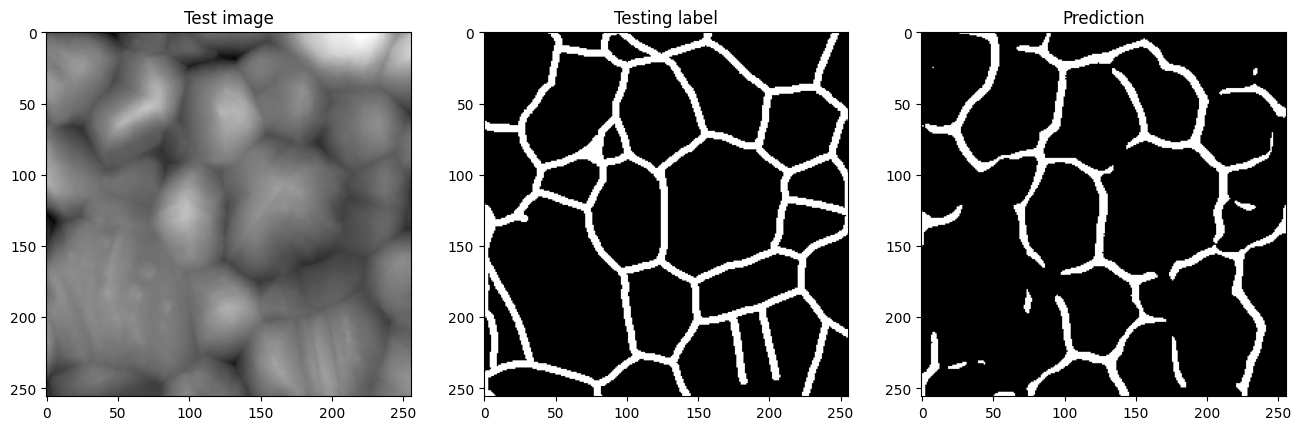

In [56]:
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:, :, 0][:, :, None]
test_img_input = np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0, :, :, 0] > 0.5).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Test image')
plt.imshow(test_img[:, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(ground_truth[:, :, 0], cmap='gray')
plt.title('Testing label')
plt.subplot(133)
plt.imshow(prediction, cmap='gray')
plt.title('Prediction')
plt.show()